In [1]:
# install the libraries needef
%pip install matplotlib # v3.7.1
%pip install pandas # v2.1.4
%pip install numpy # v1.26.4
%pip install baltic # v0.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 1.7 MB/s eta 0:00:00


In [2]:
# import libraries and functions from particular libraries
import io
import baltic as bt
import pandas as pd
import numpy as np
import re
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle

In [3]:
# loading the tree first
from google.colab import files
uploaded = files.upload()

Saving mcct_lauryinas.tree.nwk to mcct_lauryinas.tree.nwk


In [4]:
# then using the tree so that the python object exists within the environment and we can load the table afterwards
# make sure the name of the file coincides with the file name to which the file was uploaded above
mcct_path=io.StringIO(uploaded['mcct_lauryinas.tree.nwk'].decode('utf-8'))

print(mcct_path)
# load the tree
cc=bt.loadNewick(mcct_path) ## treeFile here can alternatively be a path to a local file

# get tree stats, like branch and node height
cc.treeStats()
# "build the tree" from the information in the newick tree
cc.drawTree()
# sort branches ascendently
cc.sortBranches() # descending=False
# set the absolute time, this can be the date of sampling but it is irrelevant
# particularly if the tree is not calibrated
cc.setAbsoluteTime(2018)


Tree height: 0.239219
Tree length: 7.399844
strictly bifurcating tree

Numbers of objects in tree: 217 (108 nodes and 109 leaves)



In [5]:
# now that the tree exists in the environment, we can replace the file load with the table by loading the table
from google.colab import files
uploaded = files.upload()

Saving Table2.csv to Table2.csv


In [6]:
# make sure the name of the file coincides with the file name to which the file was uploaded above
table_path = io.StringIO(uploaded['Table2.csv'].decode('utf-8'))

table = pd.read_csv(table_path, sep = ';') # change the separator according to your file
table.head(5)

,tip_name,display_name,sampling_code,otu_spp,blast_spp,latitude,longitude,order,family,genus,ABGD,ABGD_ag,ASAP,ASAP_ag,GMYC,GMYC_ag,bPTP,bPTP_ag
0,Chironomus_cingulatus_CHI1097,Ch. cingulatus,CHI1097,OTU1,Chironomus cingulatus,decimal coordinates,decimal coordinates,Diptera,Chironomidae,Chironomus,ABGD1,Disagree,ASAP1,Disagree,GMYC1,Disagree,bPTP1,Disagree
1,Chironomus_cingulatus_CHI952,Ch. cingulatus,CHI952,OTU1,Chironomus cingulatus,decimal coordinates,decimal coordinates,Diptera,Chironomidae,Chironomus,ABGD1,Disagree,ASAP1,Disagree,GMYC1,Disagree,bPTP1,Disagree
2,Chironomus_cingulatus_CHI951,Ch. cingulatus,CHI951,OTU1,Chironomus cingulatus,decimal coordinates,decimal coordinates,Diptera,Chironomidae,Chironomus,ABGD1,Disagree,ASAP1,Disagree,GMYC1,Disagree,bPTP1,Disagree
3,Chironomus_cingulatus_CHI1627,Ch. cingulatus,CHI1627,OTU1,Chironomus cingulatus,decimal coordinates,decimal coordinates,Diptera,Chironomidae,Chironomus,ABGD1,Disagree,ASAP1,Disagree,GMYC1,Disagree,bPTP1,Disagree
4,Chironomus_piger_CHI808,Ch. piger,CHI808,OTU2,Chironomus piger,decimal coordinates,decimal coordinates,Diptera,Chironomidae,Chironomus,ABGD1,Disagree,ASAP1,Disagree,GMYC1,Disagree,bPTP1,Disagree


In [7]:
# how to remove text and create new columns with only the numerical part of the value

# create a new set of empty columns that will contain an integer i.e. a number
table[['otu_spp_num', 'ABGD_num', 'ASAP_num', 'GMYC_num', 'bPTP_num']] = int()
print(table.columns)

# enumerate creates an index for whatever you are listing. In this case, creates one index for each of the rows that itertuples shows
# itertuples lets you slice the table by row and acess the column information for that particular row only
# withuot the need to pass pandas the exact coordinates of the row:column cell

for colindex,row in enumerate(table.itertuples()):
  # print(colindex,row.ASAP) # uncomment this and the print below to see how it works
  # now, we want to replace the letter characters with "nothing", leaving only the numbers
  # we are using RegEx for that
  temptext = re.sub('[A-Za-z]','',row.ASAP)
  # print(temptext)

# now, we assign the number to the corresponding column. You could do this for all the new columns using loops within loops but I will instead define a
# function to do that, so that we don't need to do too many "dificult to read" loops

def grepNumber(data, col):
  """
  The function removes letters from the cell value in a dataframe's column
  data is the table or dataframe
  col is the name of the column to "clean from letters" :D
  returns a new column with only numbers
  """
  for colindex,row in enumerate(data.itertuples(index=False)):
    cellvalue = getattr(row, col)
    temptext = re.sub('[A-Za-z]', '', str(cellvalue))
    # temptext = re.sub('[A-Za-z]','',row.col)
    data.loc[colindex,'%s_num'%(col)] = int(temptext)
  return data['%s_num'%(col)]


Index(['tip_name', 'display_name', 'sampling_code', 'otu_spp', 'blast_spp',
       'latitude', 'longitude', 'order', 'family', 'genus', 'ABGD', 'ABGD_ag',
       'ASAP', 'ASAP_ag', 'GMYC', 'GMYC_ag', 'bPTP', 'bPTP_ag', 'otu_spp_num',
       'ABGD_num', 'ASAP_num', 'GMYC_num', 'bPTP_num'],
      dtype='object')


In [8]:
# now, let's fill the columns we created by applying the function.

for column in ['otu_spp', 'ABGD', 'ASAP', 'GMYC', 'bPTP']: # these are the original columns
# '%s_num'%(column) I am using text replacement here to indicate that the result needs to be stored in the new column that ends with "_num"
  table['%s_num'%(column)] = grepNumber(table,column)

table

,tip_name,display_name,sampling_code,otu_spp,blast_spp,latitude,longitude,order,family,genus,...,ASAP_ag,GMYC,GMYC_ag,bPTP,bPTP_ag,otu_spp_num,ABGD_num,ASAP_num,GMYC_num,bPTP_num
0,Chironomus_cingulatus_CHI1097,Ch. cingulatus,CHI1097,OTU1,Chironomus cingulatus,decimal coordinates,decimal coordinates,Diptera,Chironomidae,Chironomus,...,Disagree,GMYC1,Disagree,bPTP1,Disagree,1,1,1,1,1
1,Chironomus_cingulatus_CHI952,Ch. cingulatus,CHI952,OTU1,Chironomus cingulatus,decimal coordinates,decimal coordinates,Diptera,Chironomidae,Chironomus,...,Disagree,GMYC1,Disagree,bPTP1,Disagree,1,1,1,1,1
2,Chironomus_cingulatus_CHI951,Ch. cingulatus,CHI951,OTU1,Chironomus cingulatus,decimal coordinates,decimal coordinates,Diptera,Chironomidae,Chironomus,...,Disagree,GMYC1,Disagree,bPTP1,Disagree,1,1,1,1,1
3,Chironomus_cingulatus_CHI1627,Ch. cingulatus,CHI1627,OTU1,Chironomus cingulatus,decimal coordinates,decimal coordinates,Diptera,Chironomidae,Chironomus,...,Disagree,GMYC1,Disagree,bPTP1,Disagree,1,1,1,1,1
4,Chironomus_piger_CHI808,Ch. piger,CHI808,OTU2,Chironomus piger,decimal coordinates,decimal coordinates,Diptera,Chironomidae,Chironomus,...,Disagree,GMYC1,Disagree,bPTP1,Disagree,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Orthocladius_oblidens_ORT585,Ort. oblidens,ORT585,OTU54,Orthocladius oblidens,decimal coordinates,decimal coordinates,Diptera,Chironomidae,Orthocladius,...,Agree,GMYC28,Disagree,bPTP27,Disagree,54,53,56,28,27
105,Orthocladius_oblidens_ORT584,Ort. oblidens,ORT584,OTU54,Orthocladius oblidens,decimal coordinates,decimal coordinates,Diptera,Chironomidae,Orthocladius,...,Agree,GMYC28,Disagree,bPTP27,Disagree,54,53,56,28,27
106,Orthocladius_rubicundus_ORT1515,Ort. rubicundus,ORT1515,OTU55,Orthocladius rubicundus,decimal coordinates,decimal coordinates,Diptera,Chironomidae,Orthocladius,...,Agree,GMYC28,Disagree,bPTP27,Disagree,55,54,57,28,27
107,Stenochironomus_gibbus_STE525,Ste. gibbus,STE525,OTU56,Stenochironomus gibbus,decimal coordinates,decimal coordinates,Diptera,Chironomidae,Stenochironomus,...,Agree,GMYC29,Agree,bPTP28,Agree,56,55,58,29,28


In [9]:
for k in cc.Objects:
    if isinstance(k, bt.leaf) or k.branchType == 'leaf':
        ypos = k.y
        name = k.name
        temp = table[table['tip_name'] == k.name]
        if len(temp) <1:
          print(k.name) # nothing should be plotted if all the names in the tree exist in the table

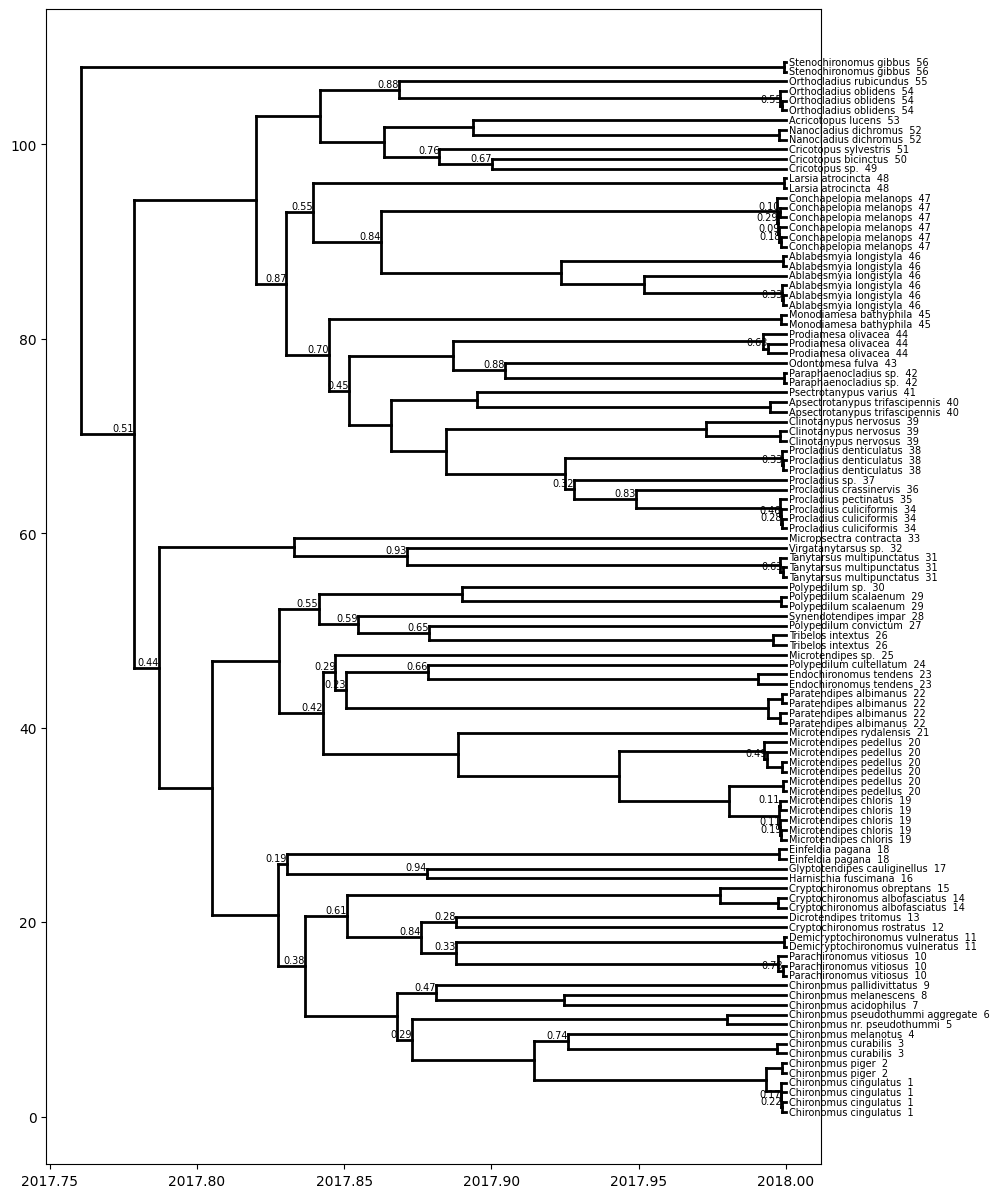

In [10]:
# draft plot of the tree
fig, ax = plt.subplots(figsize = (10,15), facecolor = None)

xpos = 2018
x_attr=lambda k: k.absoluteTime

cc.plotTree(ax, x_attr = x_attr, colour = 'k') ## tree
cc.plotPoints(ax, x_attr = x_attr, size = 0, colour = 'w', zorder = 10) ## tips

for k in cc.Objects:
    if isinstance(k, bt.leaf) or k.branchType == 'leaf':
        ypos = k.y
        name = k.name
        temp = table[table['tip_name'] == k.name]
        temotunum = temp['otu_spp_num'].values[0]
        display = temp['blast_spp'].values[0]

        ax.text(xpos + 0.001, ypos, s='%s  %s' % (display, temotunum), fontsize = 7, va = 'center', zorder = 1)

for k in cc.Objects:
    if isinstance(k, bt.leaf) or k.branchType == 'leaf':
      pass
    else:
      posterior = k.traits['posterior']
      if posterior < 0.95:
        ax.text((2018-(cc.treeHeight-k.height))-0.00002, k.y+0.6, s = '%.2f' % (posterior), fontsize = 7, ha = 'right', va = 'center', zorder = 1)

plt.show()

ASAP1 0.0 6
ASAP2 6.0 2
ASAP3 8.0 1
ASAP4 9.0 1
ASAP5 10.0 1
ASAP6 11.0 1
ASAP7 12.0 1
ASAP8 13.0 1
ASAP9 14.0 3
ASAP10 17.0 2
ASAP11 19.0 1
ASAP12 20.0 1
ASAP13 21.0 2
ASAP14 23.0 1
ASAP15 24.0 1
ASAP16 25.0 1
ASAP17 26.0 2
ASAP18 28.0 5
ASAP19 33.0 2
ASAP20 35.0 4
ASAP21 39.0 1
ASAP22 40.0 4
ASAP23 44.0 2
ASAP24 46.0 1
ASAP25 47.0 1
ASAP26 48.0 2
ASAP27 50.0 1
ASAP28 51.0 1
ASAP29 52.0 2
ASAP30 54.0 1
ASAP31 55.0 3
ASAP32 58.0 1
ASAP33 59.0 1
ASAP34 60.0 4
ASAP35 64.0 1
ASAP36 65.0 1
ASAP37 66.0 3
ASAP38 69.0 2
ASAP39 71.0 1
ASAP40 72.0 2
ASAP41 74.0 1
ASAP42 75.0 2
ASAP43 77.0 1
ASAP44 78.0 3
ASAP45 81.0 2
ASAP46 83.0 3
ASAP47 86.0 1
ASAP48 87.0 2
ASAP49 89.0 6
ASAP50 95.0 2
ASAP51 97.0 1
ASAP52 98.0 1
ASAP53 99.0 1
ASAP54 100.0 2
ASAP55 102.0 1
ASAP56 103.0 3
ASAP57 106.0 1
ASAP58 107.0 2


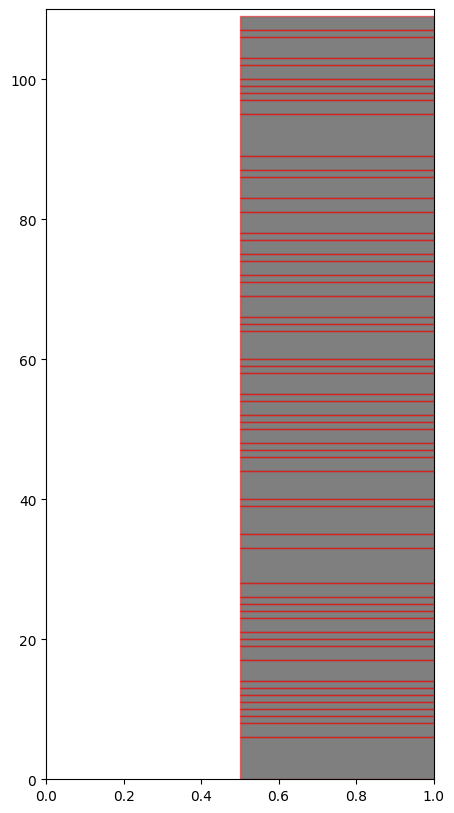

In [11]:
# group tips by species delimitation methods' resulting otus to calculate height
# find the lowest tip that belongs to that otu and set the rectangle's dimensions
# store rectangles in list
# plot rectangles

# create dictionary connecting tip names to y positions
mdotu_tipname = {}
for k in cc.Objects:
    if isinstance(k, bt.leaf) or k.branchType == 'leaf':
        mdotu_tipname[k.name] = k.y
# print(mdotu_tipname)

fig,ax = plt.subplots(figsize = (5,10),facecolor=None)
ax.set_ylim(0,110)

rectangles = []

for mdotu in table['ASAP'].unique():
  temp = table[table['ASAP'] == mdotu]
  height = len(temp)
  ypositions = temp['tip_name'].map(mdotu_tipname).values
  minypos = min(ypositions)-0.5
  print(mdotu, minypos, height)
  rectangles.append(Rectangle((0.5, minypos), width = 2, height = height, facecolor = 'k', alpha = 0.5,
                              edgecolor = 'r', linewidth = 1))
for rec in rectangles:
  ax.add_patch(rec)
plt.show()

In [12]:
def plotMotus(table, column, xpos):
  """
  counts the number of individuals in an otu based on the method
  and gets the minimum y position to plot it
  returns a list of rectangles to plot
  """
  rectangles = []
  for mdotu in table[column].unique():
    temp = table[table[column] == mdotu]
    height = len(temp)
    ypositions = temp['tip_name'].map(mdotu_tipname).values
    minypos = min(ypositions)
    facecolor = '#87B9D7' if temp['%s_ag'%(column)].unique() == 'Agree' else '#C7D8E4'
    alpha = 1
    # print(mdotu, minypos, height)
    rectangles.append(Rectangle((xpos, minypos-0.5), width = 4, height = height, facecolor = facecolor, alpha = alpha,
                                edgecolor = 'w', linewidth = 1))
  return rectangles

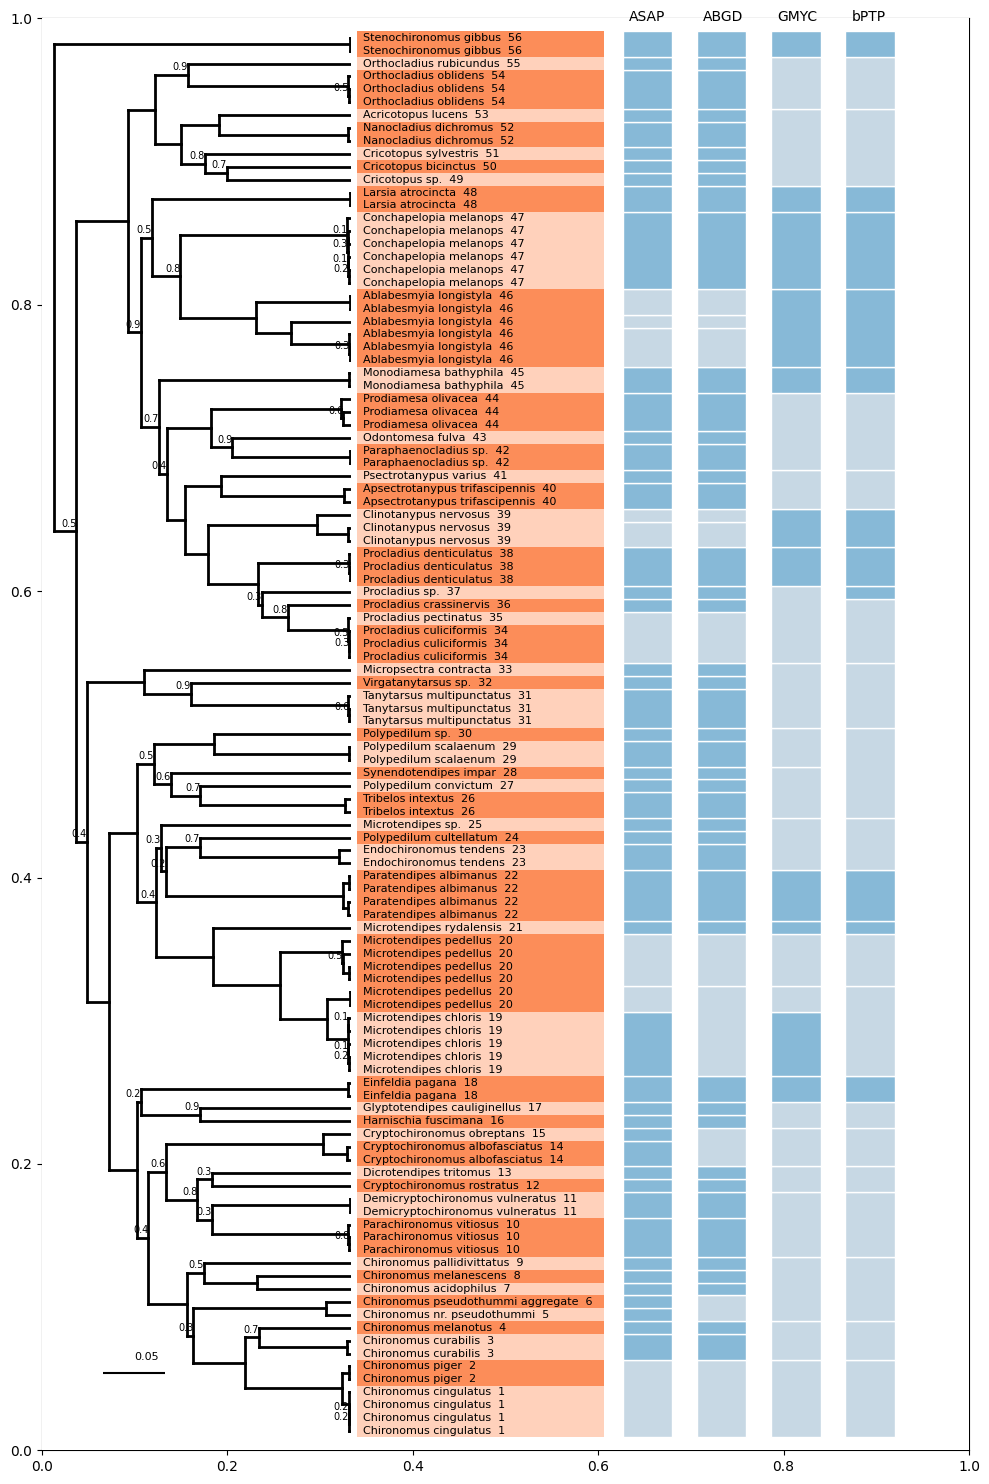

In [13]:
# now, let's try assigning binary colours to otus depending on whether they are odd or even
# define a fucntion to check the number
def checkNumber(number):
    if int(number) % 2 == 0:
        return 'even'
    else:
        return 'odd'

# let's create the dictionary:
binarycolotu = {'even': '#FC8D59', 'odd': '#FFD1BB'}

fig,ax = plt.subplots(figsize = (10,15), facecolor = None)

width = 4
height = 1
edgecolor = 'w'
linewidth = 0
alpha = 1 # transparency 1 = not transparent, 0 = fully transparent

# create the plot with two columns and one row
gs = gridspec.GridSpec(1, 2, figure = fig,  width_ratios = [0.5,1], wspace = 0)

###############################################################################################
# first subplot, column to the left
ax1 = fig.add_subplot(gs[0, 0])
# note that everything in this subplot goes to ax1
ax1.set_ylim(-1,cc.ySpan+1)
ax1.set_xlim(2018-cc.treeHeight-0.01,2018)

xpos = 0
x_attr=lambda k: k.absoluteTime
cc.plotTree(ax1, x_attr = x_attr, colour = 'k') ## tree
cc.plotPoints(ax1, x_attr = x_attr, size = 0, colour = 'w', zorder = 10) ## tips

# this blok of code plot the posterior values
for k in cc.Objects:
    if isinstance(k, bt.leaf) or k.branchType == 'leaf':
      pass
    else:
      posterior = k.traits['posterior']
      if posterior < 0.95:
        ax1.text((2018-(cc.treeHeight-k.height))-0.00005, k.y+0.6, s = '%.1f' % (posterior), fontsize = 7, ha = 'right',va = 'center', zorder = 1)

# the followign plots the scale
ax1.hlines(5, 2017.8, 2017.85, colors = 'k', linestyles = 'solid', label = '20') # y, xmin,xmax
ax1.text(2017.825,6, s = '0.05', fontsize = 8) #x,y

###############################################################################################
# second subplot, column to the right
# everything in this subplot goes to ax2
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_ylim(-1,cc.ySpan+1)
ax2.set_xlim(0,50)

xpos = 0 # it is a different subplot and we can start plotting from zero, not from the tree tips

for k in cc.Objects:
    if isinstance(k, bt.leaf) or k.branchType == 'leaf':
        ypos = k.y
        name = k.name
        temp = table[table['tip_name'] == k.name]
        temotunum = temp['otu_spp_num'].values[0]
        tempotusppnum = checkNumber(temotunum)
        # Plot the high taxonomic rank rectangles behind the tree
        rectotu = Rectangle((xpos + 0.5, ypos - 0.5), width=20, height = height, facecolor = binarycolotu[tempotusppnum], alpha = alpha,
                            edgecolor = edgecolor, linewidth = linewidth, zorder = 0)
        ax2.add_patch(rectotu)

slide = width + 2
for k in cc.Objects:
    if isinstance(k, bt.leaf) or k.branchType == 'leaf':
        ypos = k.y
        name = k.name
        temp = table[table['tip_name'] == k.name]
        temotunum = temp['otu_spp_num'].values[0]
        display = temp['blast_spp'].values[0]

        ax2.text(xpos + 1, ypos, s='%s  %s' % (display, temotunum), fontsize = 8, va = 'center', zorder = 1)

# Plot ASAP rectangle
asap_rects = plotMotus(table, 'ASAP', xpos + 22)
for rec in asap_rects:
  ax2.add_patch(rec)

# # Plot ABGD rectangle
abgd_rects = plotMotus(table, 'ABGD', xpos + 22 + (slide * 1))
for rec in abgd_rects:
  ax2.add_patch(rec)

gmyc_rects = plotMotus(table, 'GMYC', xpos + 22 + (slide * 2))
for rec in gmyc_rects:
  ax2.add_patch(rec)

bPTP_rects = plotMotus(table, 'bPTP', xpos + 22 + (slide * 3))
for rec in bPTP_rects:
  ax2.add_patch(rec)

# Add method labels on top
titleoffset = 22.5 # change this number to move the methods' labels uniformly
ax2.text(xpos + titleoffset, cc.ySpan + 0.8, s='ASAP', fontsize=10)
ax2.text(xpos + titleoffset + (slide * 1), cc.ySpan + 0.8, s = 'ABGD', fontsize = 10)
ax2.text(xpos + titleoffset + (slide * 2), cc.ySpan + 0.8, s = 'GMYC', fontsize = 10)
ax2.text(xpos + titleoffset + (slide * 3), cc.ySpan + 0.8, s = 'bPTP', fontsize = 10)

# Remove axis spines on the subplots
for ax in [ax1,ax2]:
  [ax.spines[loc].set_visible(False) for loc in ['right', 'top', 'bottom', 'left']]
  # removing the number labels on the axes of the subplots
  ax.set_xticks([])
  ax.set_yticks([])

plt.tight_layout()
# plt.savefig('./filepathname.pdf',pdi=250)
# plt.savefig('./filepathname.svg',pdi=250)

plt.show()